In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("C:\\Users\\adity\\Desktop\\Housing.csv") 
data.head() #top 5 columns

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info() #check data information to check for null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


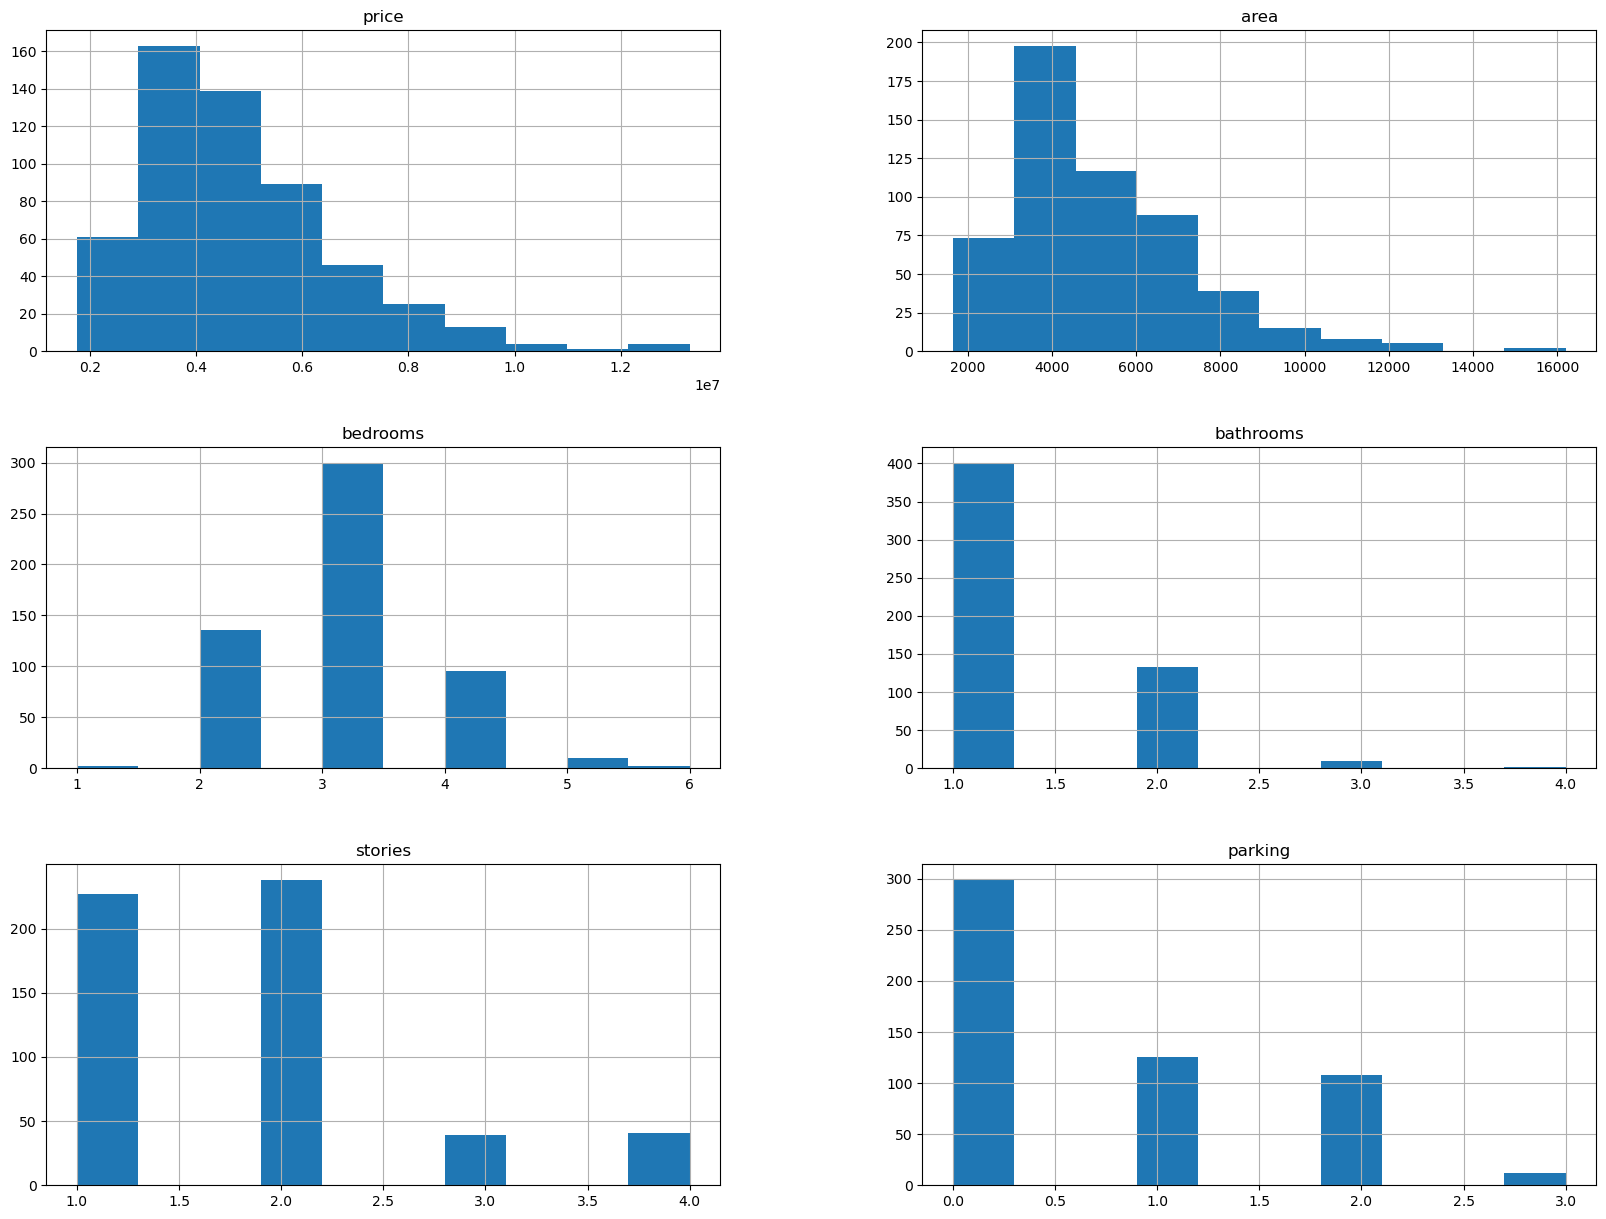

In [5]:
data.hist(figsize=(20,15));

In [6]:
data.corr()

C:\Users\adity\AppData\Local\Temp\ipykernel_7436\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


C:\Users\adity\AppData\Local\Temp\ipykernel_7436\473553653.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


<Axes: >

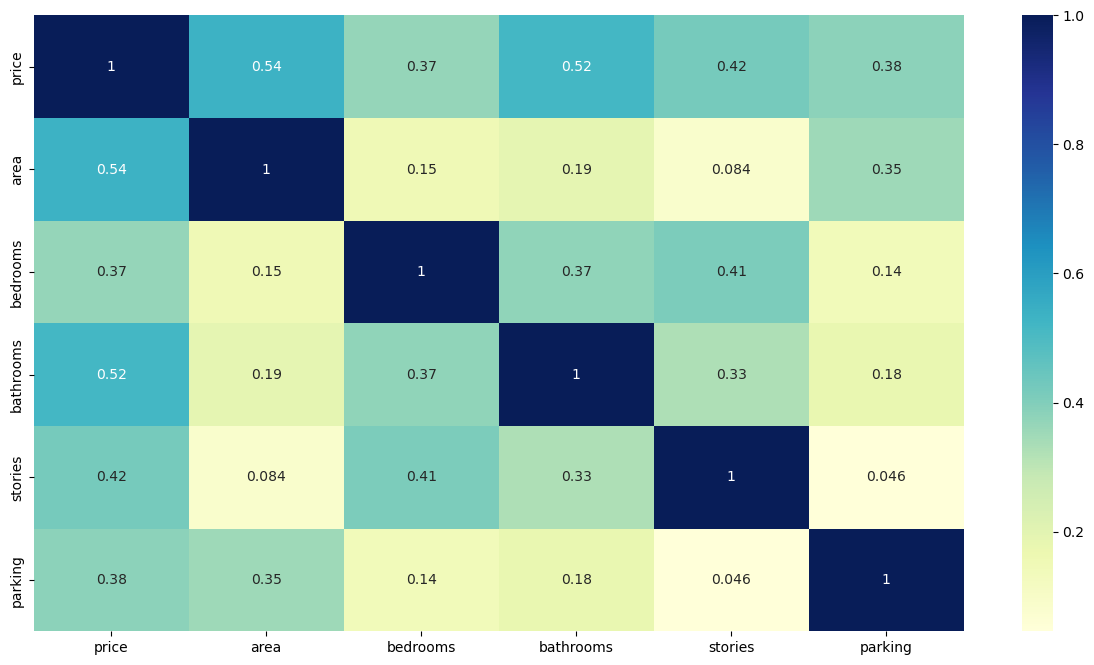

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

<Axes: xlabel='price', ylabel='area'>

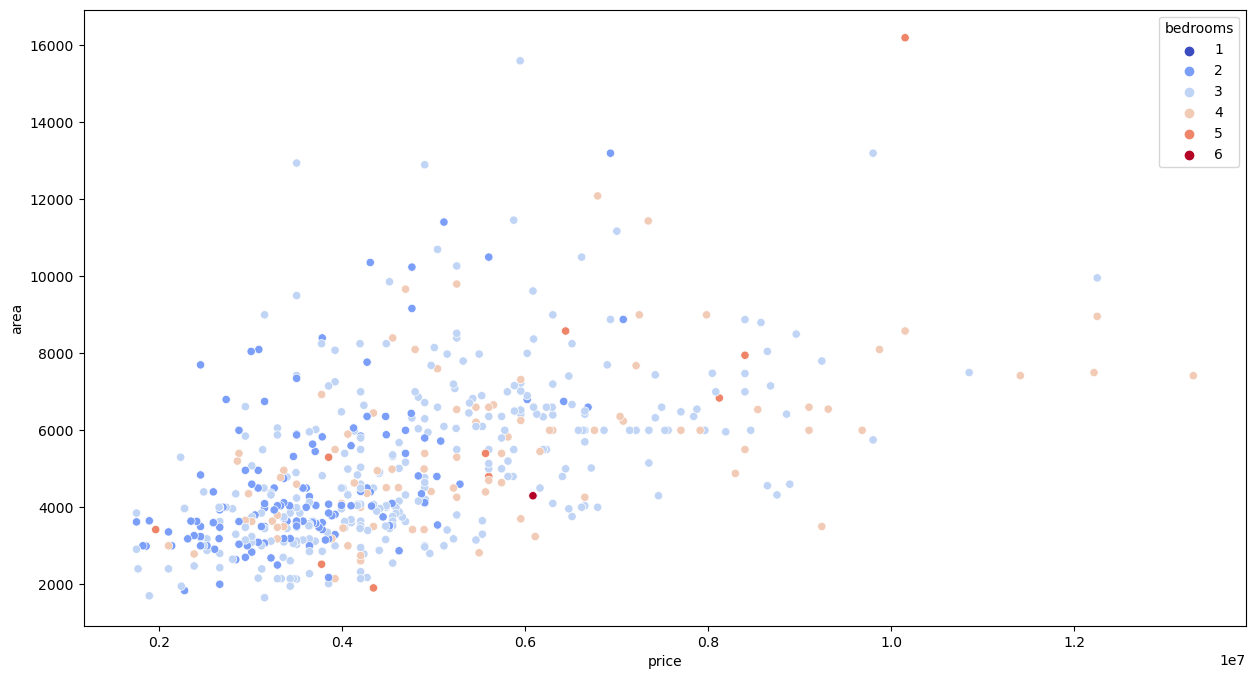

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x ='price', y='area', data=data, hue ='bedrooms', palette='coolwarm')

<br>Observations:</br>
  - Here red dots are houses which are expensive

In [9]:
data['bedrooms'] = np.log(data['bedrooms'] + 1)
data['bathrooms'] = np.log(data['bathrooms'] + 1)
data['stories'] = np.log(data['stories'] + 1)

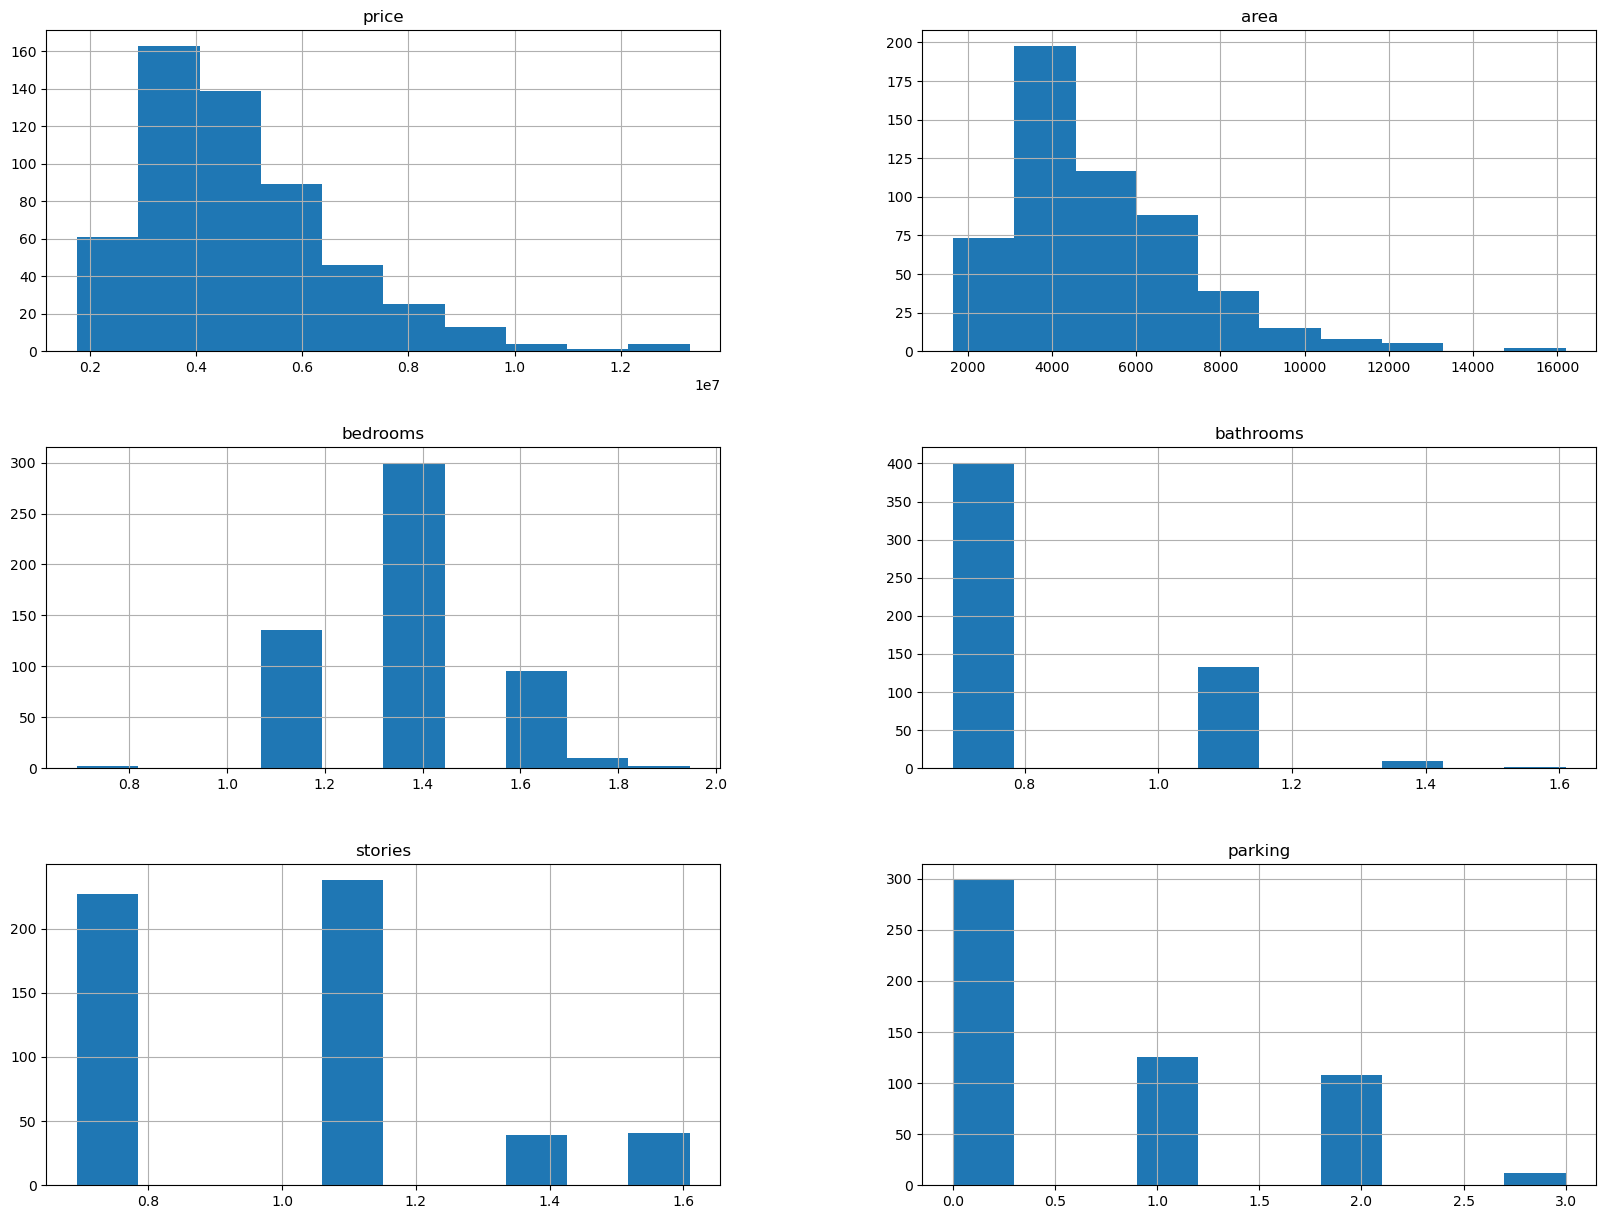

In [10]:
data.hist(figsize=(20,15));

In [11]:
data.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [12]:
data.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [13]:
data['bedrooms_ratio'] = data['bedrooms']/data['stories']
data['price per area'] = data['price']/data['area']

C:\Users\adity\AppData\Local\Temp\ipykernel_7436\473553653.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


<Axes: >

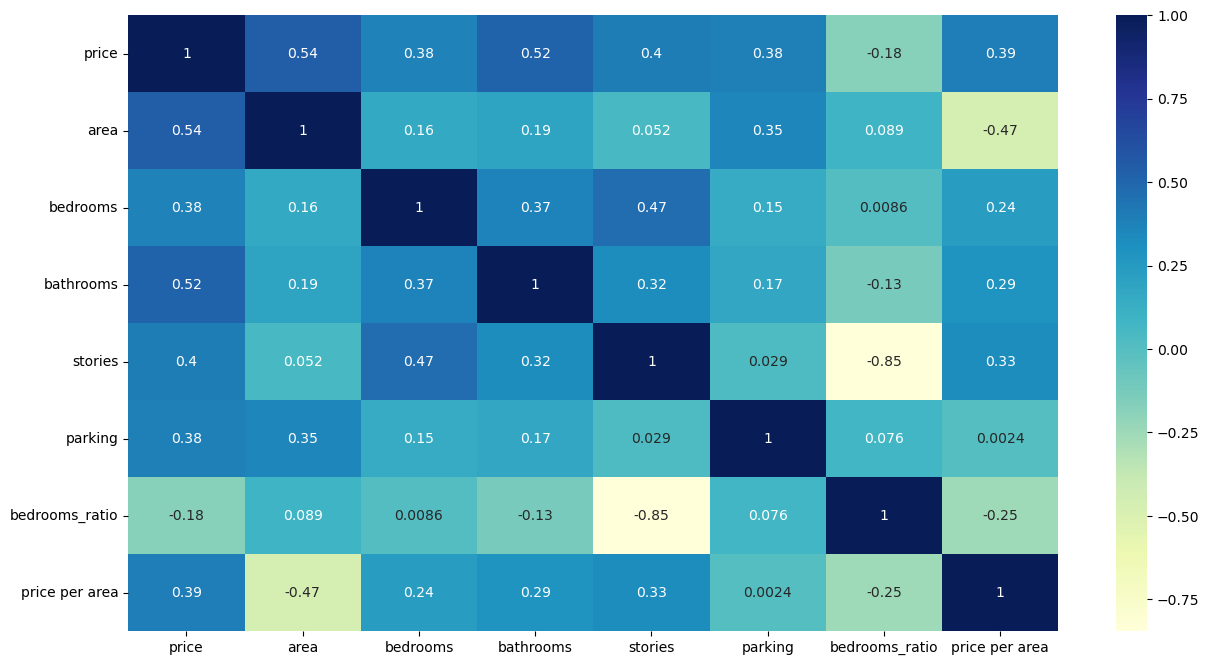

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(['bedrooms_ratio'], axis=1)
y = data['bedrooms_ratio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
print(X.shape)

(545, 14)


In [18]:
print(Y.shape)

(545,)


In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test,y_test)

ValueError: could not convert string to float: 'yes'

In [65]:
predictions = linear_model.predict(X_test)

ValueError: could not convert string to float: 'yes'

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'data' is the name of your dataset
X = data.drop(['bedrooms'], axis=1)
y = data['bedrooms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
score = linear_model.score(X_test, y_test)

print("Model score:", score)

ValueError: could not convert string to float: 'yes'